Precision: 0.00, Recall: 0.00, F1: 0.00


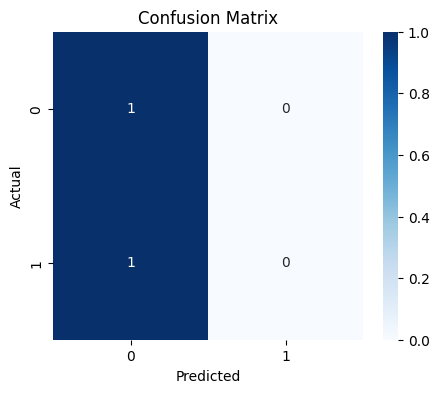

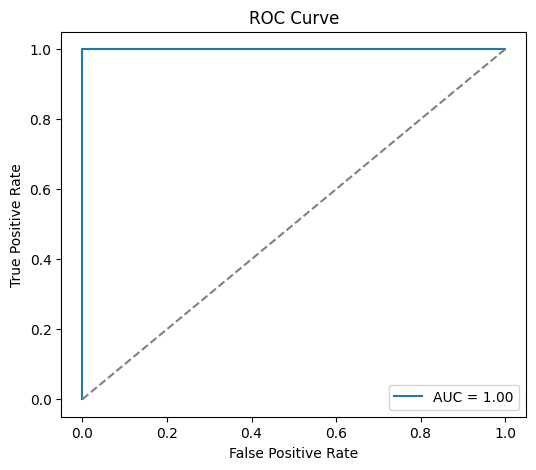

In [5]:
import sys
sys.path.append("..")  # to load your src

from src.preprocess import load_data, encode_labels, vectorize_text
from src.models import train_and_evaluate
from src.utils import plot_confusion_matrix, plot_roc_curve

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# --- Load and preprocess ---
df = load_data("../data/spam.csv")
df = encode_labels(df)
X, y, vectorizer = vectorize_text(df)

# --- Split with stratify to fix class imbalance issues ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Train and predict ---
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Metrics with zero_division ---
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

# --- Confusion matrix with fixed labels list ---
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm, title="Confusion Matrix")

# --- ROC curve ---
plot_roc_curve(model, X_test, y_test)